# Исследование модели Эрдеша-Реньи на соответствие модели веб-графа

### Задание 1
Построить случайный граф в соответствии с моделью Эрдеша-Реньи (N > 1000 вершин, p = 0.003). Построить график распределения вершин в log-log координатах для проверки соответствия степенному закону.

In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import pylab
from collections import Counter

matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
%matplotlib inline
pylab.rcParams['figure.figsize'] = 8,8

In [2]:
G = nx.gnp_random_graph(5000, 0.003)

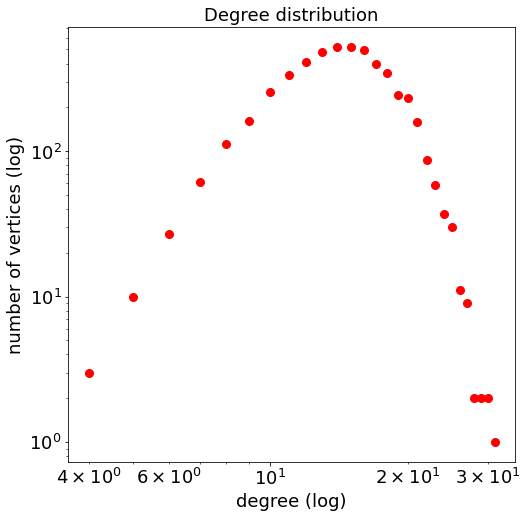

In [3]:

degrees = Counter(dict(nx.degree(G)).values())
sorted_degree_values = sorted(degrees.keys())
counts = [degrees[d] for d in sorted_degree_values]

plt.loglog(sorted_degree_values, counts, ls='None', marker='o', color='r', markersize=8)
plt.xlabel("degree (log)", fontsize=18)
plt.ylabel("number of vertices (log)", fontsize=18)
plt.title("Degree distribution", fontsize=18)
plt.show()

Вывод: степенной закон распределения степеней не наблюдается (график не приближаем линейной функцией); поэтому модель Эрдеша-Реньи не подходит для описания веб-графов.

### Задание 2
...